# Lav nogle kort til alle stederne.

Det kunne være meget rart at have nogle kort til alle stederne i bogudgaven

Ideen er at man kan efterhånden som steder bliver introduceret indsætter en side med et kort og noget beskrivelseshalløj.

Men først kortene.

Stadia har nogle pæne kort der er gratis til ikke-kommerciel brug. 
API key kan oprettes her: https://docs.stadiamaps.com/


In [95]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import contextily as ctx
import xyzservices.providers as xyz
from mpl_toolkits.axes_grid1 import inset_locator


import matplotlib.pyplot as plt

# Read in the data
df = pd.read_csv('../data/places.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')
place = gdf.loc[gdf['name'] == 'Vivaise']

(1.5599265999999998, 5.5599266, 47.6198789, 51.6198789)


C:\Users\christian.dalager\AppData\Local\Temp\ipykernel_58816\2113103146.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, 'bo', markersize=10, alpha=0.7,color='red')
C:\Users\christian.dalager\AppData\Local\Temp\ipykernel_58816\2113103146.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  inset_ax.plot(x, y, 'bo',color='red')


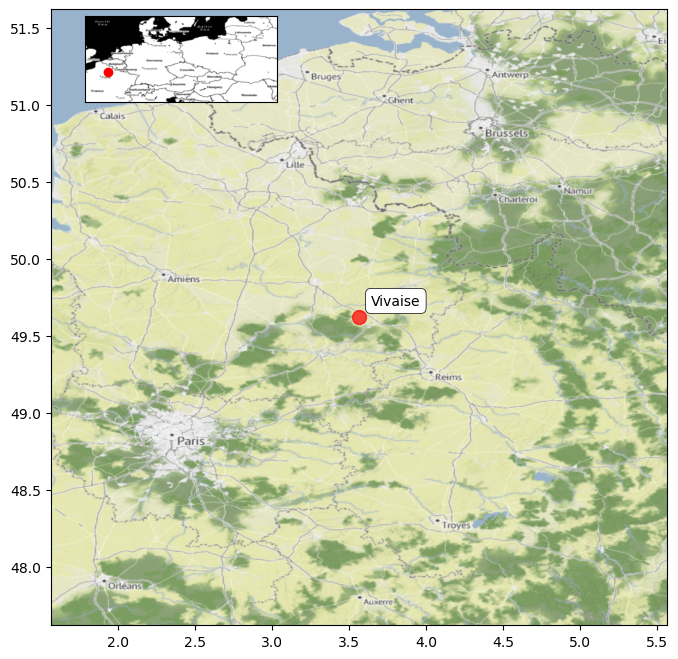

In [121]:

# get an image from the xyz services
apitoken = '10684642-480c-4a16-8eb9-243e699b69ac'
mapstyle = 'stamen_terrain'
# mapstyle = 'outdoors'

point = place.geometry.iloc[0]
x, y = point.x, point.y

# Define the extent based on the point coordinates
buffer = 2
extent = (x - buffer, x + buffer, y - buffer, y + buffer)

print(extent)
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis(extent)

apitoken = '10684642-480c-4a16-8eb9-243e699b69ac'
ctx.add_basemap(ax, crs='EPSG:4326', source='https://tiles.stadiamaps.com/tiles/'+mapstyle+'/{z}/{x}/{y}{r}.png?api_key='+apitoken)

# add a marker for the point
ax.plot(x, y, 'bo', markersize=10, alpha=0.7,color='red')
# add the place name
ax.annotate(place.name.iloc[0], xy=(x, y), xytext=(x + 0.08, y + 0.08),bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", lw=0.5))

# Create the inset plot
inset_ax = inset_locator.inset_axes(ax, width="40%", height="14%", loc=2)
inset_ax.axis((0, 29, 45, 58))
inset_ax.show_axes = False
# Add the basemap to the inset plot
ctx.add_basemap(inset_ax, crs='EPSG:4326', source='https://tiles.stadiamaps.com/tiles/stamen_toner/{z}/{x}/{y}{r}.png?api_key='+apitoken)

# Add a marker for the point
inset_ax.plot(x, y, 'bo',color='red')
inset_ax.set_xticks([])
inset_ax.set_yticks([])

# Show the plot
plt.show()




<Axes: >

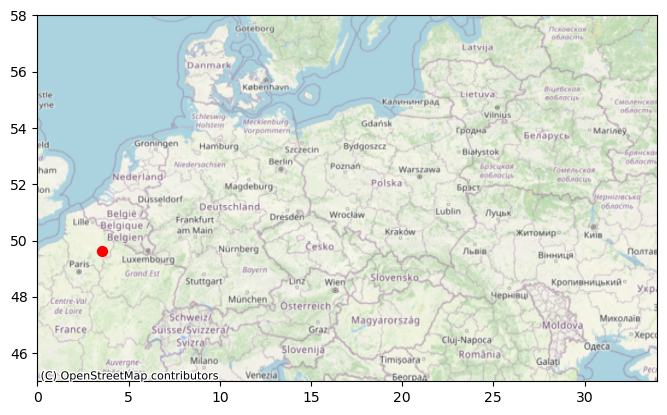

In [53]:


# plot with basemap
#fig, ax = plt.subplots(figsize=(15, 15))
#ax.set_ylim(50,58)
#ax.set_xlim(0,14)

#ax = place.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
#cx.add_basemap(ax, crs='epsg:4326')
#extent = (-12600000, -10300000, 1800000, 3800000)
# ax.set_ylim(45,58)
# ax.set_xlim(0,34)
#extent = (0, 34, 45, 58)

fig, ax = plt.subplots(figsize=(8, 8))
ax.axis(extent)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs='epsg:4326')
place.plot(ax=ax, color='red', markersize=50)
#cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
# add a marker for the place

# add a label
#ax.text(x=place.geometry.x, y=place.geometry.y, s=place['name'].values[0], fontsize=20)
#plt.tight_layout()
#plt.savefig('vivaise.png', dpi=300)
#plt.show()

